<a href="https://colab.research.google.com/github/NicoSammur/prediccion-stock-chile-ml/blob/main/Predict_ENELCHILE_SN_with_SVR_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# Predict ENELCHILE.SN using support vector regression for an specific day
# nicolas _@_ ipv4.cl

In [62]:
# Libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')

In [76]:
#Load data
from google.colab import files
files.upload()

Saving ENELCHILE.SN.csv to ENELCHILE.SN (1).csv


{'ENELCHILE.SN.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2016-04-21,71.019997,90.000000,80.000000,88.110001,79.722160,3291265\n2016-04-22,88.110001,89.900002,87.370003,88.989998,80.518387,3179586\n2016-04-25,88.989998,88.349998,83.500000,86.040001,77.849220,3805213\n2016-04-26,86.040001,87.000000,82.510002,84.570000,76.519157,18200224\n2016-04-27,84.570000,84.199997,81.010002,82.739998,74.863365,6916806\n2016-04-28,82.739998,83.949997,81.059998,82.370003,74.528595,29104868\n2016-04-29,82.370003,82.500000,80.000000,80.910004,73.207588,19986945\n2016-05-02,80.910004,82.970001,81.500000,82.699997,74.827171,33373102\n2016-05-03,82.699997,82.750000,81.050003,82.629997,74.763855,9719899\n2016-05-04,82.629997,83.000000,80.750000,81.750000,73.967621,49645250\n2016-05-05,81.750000,83.010002,81.459999,82.300003,74.465263,46037530\n2016-05-06,82.300003,82.500000,81.370003,81.900002,74.103340,51854285\n2016-05-09,81.900002,82.250000,79.500000,81.480003,73.723320,30003907\n2016-05-10,81.48

In [78]:
# Store data
df = pd.read_csv('ENELCHILE.SN.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-04-21,71.019997,90.000000,80.000000,88.110001,79.722160,3291265
1,2016-04-22,88.110001,89.900002,87.370003,88.989998,80.518387,3179586
2,2016-04-25,88.989998,88.349998,83.500000,86.040001,77.849220,3805213
3,2016-04-26,86.040001,87.000000,82.510002,84.570000,76.519157,18200224
4,2016-04-27,84.570000,84.199997,81.010002,82.739998,74.863365,6916806
...,...,...,...,...,...,...,...
1171,2021-01-11,63.099998,64.580002,62.310001,63.099998,63.099998,11605295
1172,2021-01-12,63.490002,64.000000,63.009998,63.490002,63.490002,10741986
1173,2021-01-13,62.700001,65.000000,61.799999,62.700001,62.700001,24992963
1174,2021-01-14,61.570000,63.000000,61.500000,61.570000,61.570000,8524384


In [79]:
# Rows 
df.shape 

(1176, 7)

In [80]:
# Print the last row of data to confirm how the model adapts later 
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
1175,2021-01-15,60.549999,61.75,60.0,60.549999,60.549999,2048338


In [82]:
# Prepare data for training the 3 different models
# Get all data except last row to compare
df = df.head(len(df)-1)
print(df)

            Date       Open       High  ...      Close  Adj Close    Volume
0     2016-04-21  71.019997  90.000000  ...  88.110001  79.722160   3291265
1     2016-04-22  88.110001  89.900002  ...  88.989998  80.518387   3179586
2     2016-04-25  88.989998  88.349998  ...  86.040001  77.849220   3805213
3     2016-04-26  86.040001  87.000000  ...  84.570000  76.519157  18200224
4     2016-04-27  84.570000  84.199997  ...  82.739998  74.863365   6916806
...          ...        ...        ...  ...        ...        ...       ...
1169  2021-01-07  62.790001  62.790001  ...  62.790001  62.790001   9784068
1170  2021-01-08  64.589996  64.589996  ...  64.589996  64.589996  15958714
1171  2021-01-11  63.099998  64.580002  ...  63.099998  63.099998  11605295
1172  2021-01-12  63.490002  64.000000  ...  63.490002  63.490002  10741986
1173  2021-01-13  62.700001  65.000000  ...  62.700001  62.700001  24992963

[1174 rows x 7 columns]


In [83]:
# Create empty list to store the independent and dependent data
days = list()
adj_close_prices = list()

In [84]:
# Get the dates and adjusted close prices
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [85]:
# Create the independent data set
for day in df_days:
  days.append([int(day.split('-')[1])])
# Create the dependent data set
for adj_close_price in df_adj_close:
  adj_close_prices.append( float(adj_close_price) )


In [86]:
# Print the days and the adj close prices
print(days)
print(adj_close_prices)

[[4], [4], [4], [4], [4], [4], [4], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [5], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [6], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [7], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [8], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [9], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [10], [11], [11], [11], [11], [11], [11], [11], [11], [11], [11], [11], [11], [11], [11], [11], [11], [11], [11], [11], [11], [11], [12], [12], [12], [12], [12], [12], [12], [12], [12], [12], [12], [12], [12], [12], [12], [12], [12], [12], [12], [12], [12], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]

In [87]:
# Create and train 3 SVR models

# Create and train SVR using a lineal kernel
lin_svr = SVR(kernel='linear', C=1.0)
lin_svr.fit(days, adj_close_prices)

# Create and train SVR using a polynomial kernel
poly_svr = SVR(kernel='poly', C=1.0, degree = 2)
poly_svr.fit(days, adj_close_prices)

# Create and train SVR using a rbf kernel
rbf_svr = SVR(kernel='rbf', C=1.0, gamma = 0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

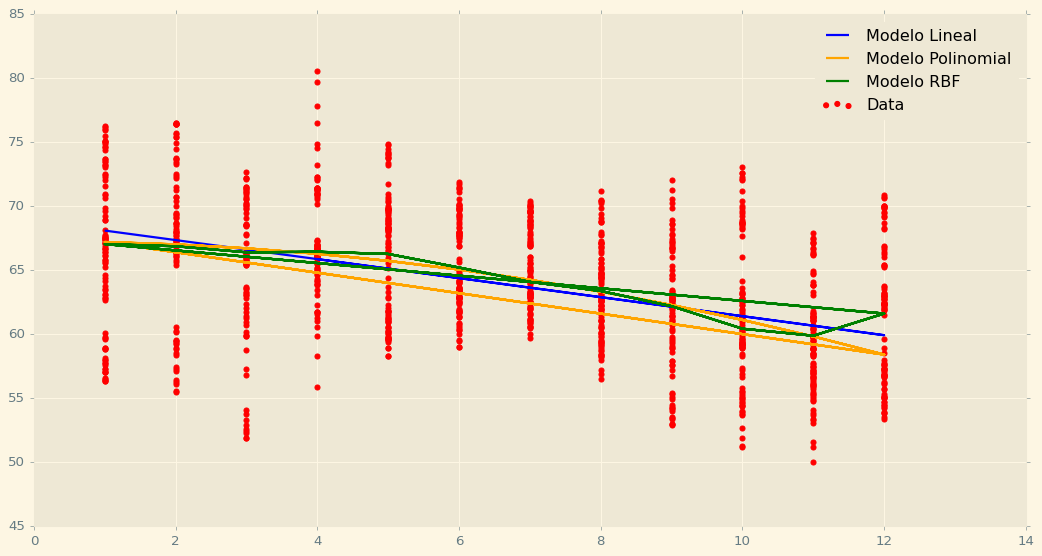

In [88]:
# Plot model to see which has the best fit on original df COPEC.SN 
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'red', label = 'Data')
plt.plot(days, lin_svr.predict(days), color = 'blue', label = 'Modelo Lineal')
plt.plot(days, poly_svr.predict(days), color = 'orange', label = 'Modelo Polinomial')
plt.plot(days, rbf_svr.predict(days), color = 'green', label = 'Modelo RBF')
plt.legend()
plt.show()

In [91]:
# Show predicted file (to confirm last date)
day = [[31]]
print('Linear SVR predicted: ', lin_svr.predict(day))
print('Polynomial SVR predicted: ', poly_svr.predict(day))
print('RBF SVR predicted: ', rbf_svr.predict(day))

Linear SVR predicted:  [45.79349987]
Polynomial SVR predicted:  [8.14273653]
RBF SVR predicted:  [64.50754981]


In [93]:
# Print the actual price of the stock on day 31
print('Actual ENELCHILE.SN is: ', actual_price['Adj Close'][1175])

Actual ENELCHILE.SN is:  60.549999
